<a href="https://colab.research.google.com/github/CFretter/komorebi/blob/main/komorebi_gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

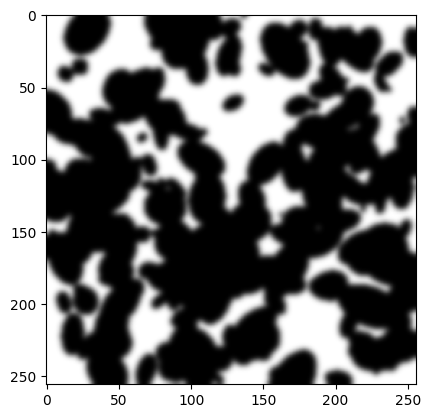

In [1]:
# prompt: create a function that creates an empty matrix and draws on a given number of black ellipses and returns it. call that function and plot the matrix as an image ellipses should also be randomly rotated do the ellipsis drawing on matrix level

import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import ellipse
from scipy.ndimage import gaussian_filter
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from skimage import exposure

def create_matrix_with_ellipses(num_ellipses,sigma):
  """
  Creates an empty matrix and draws a given number of black ellipses on it.

  Args:
    num_ellipses: The number of ellipses to draw.

  Returns:
    A NumPy array representing the matrix with the drawn ellipses.
  """

  # Create an empty matrix
  matrix_size = 256
  matrix = np.ones((matrix_size, matrix_size))

  # Draw ellipses
  for _ in range(num_ellipses):
    # Generate random ellipse parameters
    x = np.random.randint(0, matrix_size)
    y = np.random.randint(0, matrix_size)
    r = np.random.randint(2, 15)
    c = int(np.random.uniform(0.5, 2)*r)
    angle = np.random.randint(0, 360)

    # Draw the ellipse
    rr, cc = ellipse(x, y, r, c,shape=[matrix_size,matrix_size ], rotation=angle)
    matrix[rr, cc] = 0

  return gaussian_filter(matrix, sigma)

# Call the function to create the matrix
matrix = create_matrix_with_ellipses(250,2)

# Plot the matrix as an image
plt.imshow(matrix, cmap='gray')
plt.show()


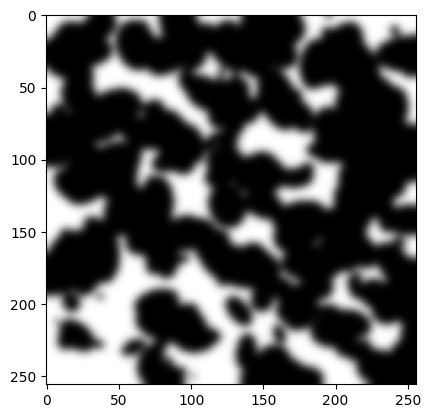

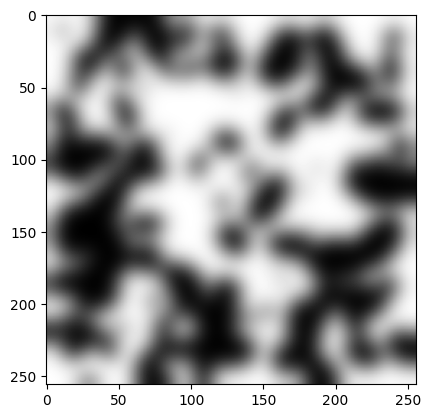

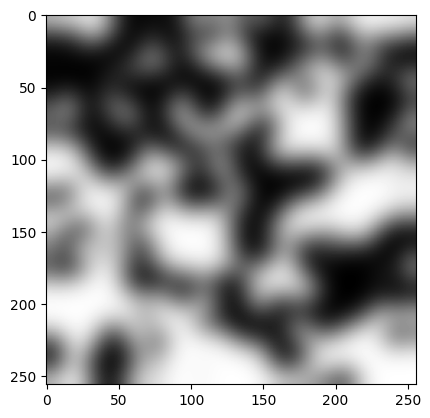

In [2]:
matrix1 = create_matrix_with_ellipses(250,3)
matrix2 = create_matrix_with_ellipses(150,7)
matrix3 = create_matrix_with_ellipses(190,9)

plt.imshow(matrix1, cmap='gray')
plt.show()
plt.imshow(matrix2, cmap='gray')
plt.show()
plt.imshow(matrix3, cmap='gray')
plt.show()

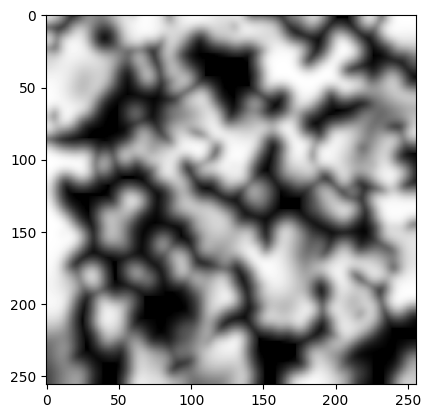

In [ ]:
plt.imshow(exposure.adjust_gamma(matrix1 *matrix2, 0.2) , cmap='gray')
plt.show()

In [ ]:
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt
margin=40
def plot_with_offset(xoff):
  res=matrix1[0:-margin,] *matrix2[xoff:-margin+xoff,]
  plt.imshow(exposure.adjust_gamma(res), cmap='gray')
  plt.show()
interact(plot_with_offset, xoff=IntSlider(min=0, max=margin-1, step=5, value=5))

interactive(children=(IntSlider(value=5, description='xoff', max=39, step=5), Output()), _dom_classes=('widget…

<function __main__.plot_with_offset(xoff)>

25 25
25 25
25 25
25 25
32 35
39 43
45 48
48 49
49 46
48 39
44 30
38 19
31 10
23 3
15 0
8 1
3 6
0 15
0 25
2 35
6 43
12 48
19 49
27 46
35 39
42 29
47 19
49 9
49 3
47 0
42 1
36 6
28 15


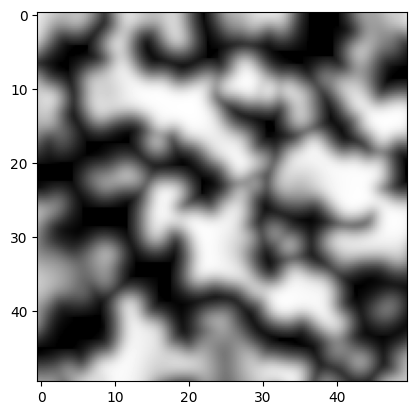

In [3]:


fig = plt.figure()
data = np.random.rand(50, 50)
im = plt.imshow(data, cmap='gray')
margin=50
total_amp=10

def animate(i):
  xoff=int(math.sin(i*0.32)*margin/2+margin/2)
  yoff=int(math.sin(i*0.42)*margin/2+margin/2)
  xoffa=int(math.sin(i*0.15)*total_amp/2+total_amp/2)
  yoffa=int(math.sin(i*0.12)*total_amp/2+total_amp/2)
  print(xoff,yoff)
  result=matrix1[0:-margin,0:-margin] *matrix2[xoff:-margin+xoff,yoff:-margin+yoff]
  result_moved=result[xoffa:-total_amp+xoffa,yoffa:-total_amp+yoffa]
  result_gamma=exposure.adjust_gamma(result_moved, 0.2)
  im.set_array(result_gamma)
  return im,

ani = FuncAnimation(fig, animate, frames=30, interval=100, blit=True, repeat=True)
HTML(ani.to_jshtml())

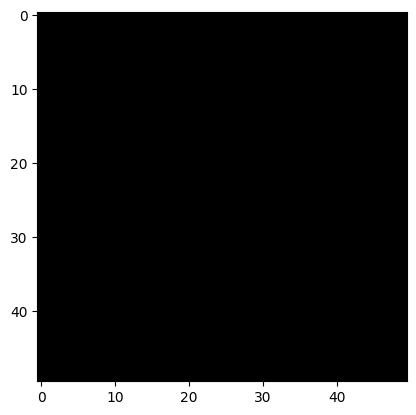

In [ ]:
fig = plt.figure()
data = np.random.rand(50, 50)
im = plt.imshow(data, cmap='gray')
margin=50

total_amp=10

def animate(i):
  xoff2=int(math.sin(i*0.32)*margin/2*0.8+margin/2)
  yoff2=int(math.sin(i*0.42)*margin/2+margin/2)
  xoff3=int(math.sin(i*0.28)*margin/2*0.2+margin/2)
  yoff3=int(math.sin(i*0.12)*margin/2*0.3+margin/2)
  xoffa=int(math.sin(i*0.15)*total_amp/2+total_amp/2)
  yoffa=int(math.sin(i*0.12)*total_amp/2+total_amp/2)
  #print(xoff,yoff)
  result=matrix1[0:-margin,0:-margin]
  result*=matrix2[xoff2:-margin+xoff2,yoff2:-margin+yoff2]
  result*=matrix3[xoff3:-margin+xoff3,yoff3:-margin+yoff3]
  result_moved=result[xoffa:-total_amp+xoffa,yoffa:-total_amp+yoffa]
  result_gamma=exposure.adjust_gamma(result_moved, 0.4)
  im.set_array(result_gamma)
  return im,

ani = FuncAnimation(fig, animate, frames=30, interval=100, blit=True, repeat=True)
HTML(ani.to_jshtml())